# **TRABAJO FINAL. GRUPO 02.**
# **"Predicción de Precios de Acciones de Google utilizando Regresión Lineal y Redes Neuronales Recurrentes: Un Enfoque de Minería de Datos"**

 *Ignacio de Lecea, Santiago Figueroa, Diego Hermana y Carla López.*

 *Ingeniería Matemática 3ºB*


## **INTRODUCCIÓN**

La predicción de precios de acciones es un área de investigación fundamental en el ámbito financiero, donde la capacidad de anticipar las tendencias del mercado puede tener un impacto significativo en las decisiones de inversión. En este proyecto, nos centramos en la aplicación de técnicas de minería de datos para predecir los precios de las acciones de Google, utilizando tanto redes neuronales recurrentes (RNN) como regresión lineal. A través del análisis de datos históricos de precios de acciones, buscamos desarrollar modelos predictivos que puedan ofrecer información valiosa a inversores y analistas financieros.

Nuestro objetivo, aparte de predecir los precios de las acciones de Google, es la comparación de los dos métodos para determinar cual es más eficaz.

## **DEFINICIÓN DEL PROBLEMA**

El problema abordado en este proyecto se centra en la predicción de los precios de las acciones de Google en Enero de 2017, empleando como base de datos los precios desde 2012-2016. Dada la volatilidad inherente del mercado de valores y la influencia de una multitud de factores, como noticias económicas, condiciones del mercado y eventos geopolíticos, predecir con precisión los movimientos de los precios de las acciones es un desafío complejo. Sin embargo, mediante el uso de técnicas de minería de datos, podemos identificar patrones y tendencias que saquen valor a los datos.

## **RESOLUCIÓN DEL PROBLEMA**

Las Redes Neuronales Recurrentes (RNN) son arquitecturas de redes neuronales utilizadas para procesar datos secuenciales, como series temporales o texto. Se destacan por su capacidad para capturar dependencias temporales en los datos, lo que las hace útiles en tareas como predicción de series temporales y procesamiento de lenguaje natural.  

Por otro lado, la regresión lineal es una técnica de modelado estadístico que se emplea para describir una variable de respuesta continua como una función de una o varias variables predictoras, asumiendo una relación lineal entre las variables independientes y la variable dependiente.  

Mientras que las RNN son ideales para capturar relaciones temporales complejas, la regresión lineal es más apropiada para problemas con relaciones lineales simples, es decir, teoricamente el método más efectivo para nuestro caso particular debería ser la RNN, dada la naturaleza compleja de los precios de las acciones.  

**MODELO RNR**  

### Paso 1.
Se recopilan y se preparan los datos históricos de precios de acciones de Google para su posterior análisis. La limpieza, la normalización y la preparación de los datos ya ha sido realizada con anterioridad, dado que es una base de datos obtenida de Kaggle.  

Para entrenar un modelo de RNN, necesitamos crear una estructura de datos adecuada. Se crea una estructura en forma de ventana deslizante con 60 pasos temporales anteriores (60 días en este caso) que almacene la información pertinente y el precio de apertura del día siguiente como la etiqueta de salida.

In [1]:
# 1 - Preprocesamiento de los datos

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Obtenemos el precio real de las acciones entre 2012 y 2016
datasetTraining = pd.read_csv('Google_Stock_Price_Train.csv')
trainingSet = datasetTraining.iloc[:, 1:2].values

# Normalización
sc = MinMaxScaler(feature_range = (0, 1))
trainingSetScaled = sc.fit_transform(trainingSet)

# Estructura de datos con 60 pasos de tiempo y 1 salida
xTrain = []
yTrain = []
for i in range(60, 1258):
    xTrain.append(trainingSetScaled[i-60:i,0])
    yTrain.append(trainingSetScaled[i, 0])
xTrain, yTrain = np.array(xTrain), np.array(yTrain)

# Reconfiguración
xTrain = np.reshape(xTrain, (xTrain.shape[0], xTrain.shape[1], 1))

### Paso 2.
El modelo consta de capas LSTM (Long Short-Term Memory) para capturar patrones secuenciales en los datos de series temporales.
Se inicializa el modelo de RNN utilizando Sequential(), que es una forma secuencial de agregar capas al modelo. Esto significa que las capas se apilan una encima de la otra en secuencia. Para nuestro modelo, agregamos cuatro capas LSTM. Cada capa LSTM tiene 60 unidades (neuronas) y devuelve secuencias completas.

### Paso 3.
También se agrega regularización por Dropout, eliminación de neuronas en las capas de la red neuronal en base a la probabilidad dada por la distribución de Bernoulli, con un valor de 0.2, lo que ayuda a prevenir el sobreajuste al apagar aleatoriamente un porcentaje de las unidades durante el entrenamiento.

In [2]:
# 2 - Construir el RNN

# Inicializar el RNN

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()

# Añadimos la primera capa de RNN
regressor.add(LSTM(units = 60, return_sequences = True, input_shape = (xTrain.shape[1], 1)))
regressor.add(Dropout(0.2))

# Segunda capa de RNN
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

# Tercera capa de RNN
regressor.add(LSTM(units = 60, return_sequences = True))
regressor.add(Dropout(0.2))

# Cuarta capa de RNN
regressor.add(LSTM(units = 60))
regressor.add(Dropout(0.2))

# Capa del output
regressor.add(Dense(units = 1))

# Compilamos

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Ajustamos el RNN al Training set con validation split
regressor.fit(xTrain, yTrain, epochs = 100, batch_size = 16)
regressor.summary()

Epoch 1/100
75/75 [==============================] - 25s 117ms/step - loss: 0.0226
Epoch 2/100
75/75 [==============================] - 8s 101ms/step - loss: 0.0049
Epoch 3/100
75/75 [==============================] - 9s 116ms/step - loss: 0.0046
Epoch 4/100
75/75 [==============================] - 7s 99ms/step - loss: 0.0047
Epoch 5/100
75/75 [==============================] - 9s 115ms/step - loss: 0.0047
Epoch 6/100
75/75 [==============================] - 9s 114ms/step - loss: 0.0044
Epoch 7/100
75/75 [==============================] - 8s 100ms/step - loss: 0.0046
Epoch 8/100
75/75 [==============================] - 8s 113ms/step - loss: 0.0037
Epoch 9/100
75/75 [==============================] - 7s 98ms/step - loss: 0.0038
Epoch 10/100
75/75 [==============================] - 9s 114ms/step - loss: 0.0039
Epoch 11/100
75/75 [==============================] - 8s 104ms/step - loss: 0.0034
Epoch 12/100
75/75 [==============================] - 8s 106ms/step - loss: 0.0034
Epoch 13/100
7

### Paso 4.
Empleamos la validación cruzada para evaluar el rendimiento del modelo en datos no vistos durante el entrenamiento, en este caso, se utiliza un validation_split del 20%. Eso es crucial para saber si el modelo esta "memorizando" los datos de entrenamiento y no generaliza bien en datos nuevos.  

El número de epochs que hemos empleado es 100, lo que determina cuántas veces el modelo verá el conjunto de datos completo, y es crucial para evitar el subajuste o el sobreajuste, con una batch size de 16, siendo el número de ejemplos que se pasan al algoritmo en cada iteración de aprendizaje. Tras varias pruebas hemos concluido que esta era la mejor configuración de nuestra RNN, ya que es con la que hemos obtenido el menor MSE.

1/1 [==============================] - 2s 2s/step


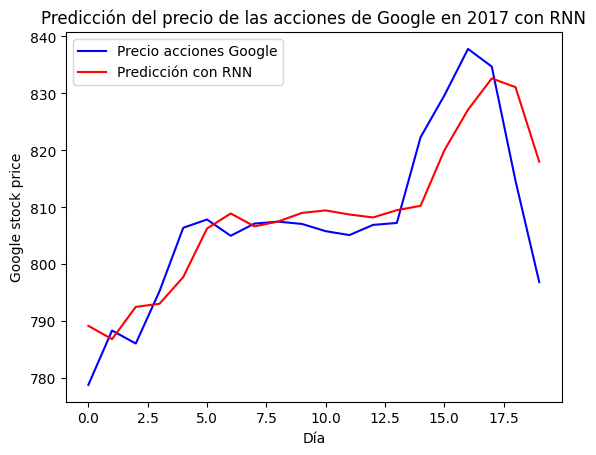

In [3]:
# 3 - Predicciones y visualización de los resultados

# Precio real en 2017
datasetTest = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = datasetTest.iloc[:, 1:2].values

# Predicción del precio de las acciones en 2017
entireDataset = pd.concat((datasetTraining['Open'], datasetTest['Open']), axis = 0)
inputs = entireDataset[len(entireDataset) - len(datasetTest) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
xTest = []
for i in range(60, 80):
    xTest.append(inputs[i-60:i, 0])
xTest = np.array(xTest)
xTest = np.reshape(xTest, (xTest.shape[0], xTest.shape[1], 1))
predicted_stock_price = regressor.predict(xTest)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)


# Representación
plt.plot(real_stock_price, color = 'Blue', label = 'Precio acciones Google')
plt.plot(predicted_stock_price, color = 'Red', label = 'Predicción con RNN')
plt.title('Predicción del precio de las acciones de Google en 2017 con RNN')
plt.xlabel('Día')
plt.ylabel('Google stock price')
plt.legend()
plt.show()

### Paso 5.
Almacenamos las predicciones y las  comparamos con los datos reales. Por otro lado calculamos el MSE. Estas son las dos mediciones que usaremos para medir la precisión de nuestro modelo.

In [4]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(real_stock_price, predicted_stock_price)
print("Error cuadrático medio (RNN):", mse)

Error cuadrático medio (RNN): 67.98841459161963


**MODELO REGRESIÓN LINEAL**  

Ahora realizaremos la predicción con el modelo de Regresión Lineal.  

Ajustamos el modelo a los datos de entrenamiento utilizando el método fit(). Los datos de entrada se deben pasar en un formato de matriz bidimensional, creando ventanas temporales de 60 días como hemos hecho en la RNR. Durante el ajuste, el modelo calculará los coeficientes de regresión que mejor se ajusten a los datos de entrenamiento, utilizando el método de mínimos cuadrados ordinarios.

 Durante el ajuste, el modelo calculará los coeficientes de regresión que mejor se ajusten a los datos de entrenamiento, utilizando el método de mínimos cuadrados ordinarios.

In [5]:
# 4 - Construir el modelo de Regresión Lineal
from sklearn.linear_model import LinearRegression

# Inicializar el modelo
regressor = LinearRegression()

# Ajustar el modelo de Regresión Lineal al Training set
regressor.fit(xTrain.reshape(-1, 60), yTrain)

LinearRegression()

Igual que en la RNR, alamacenamos las predicciones y las comparamos con los valores reales; también calculamos el MSE, ambas como medidas de precisión.  
#### Observaciones
Teoricamente el modelo de RNR debía haberse ajustado mejor a los datos que el de Regresión, sin embargo, este no ha sido el caso, lo que sugiere que la relación entre las variables de entrada y salida es lineal. SIn embargo, hay elementos no lineales importantes en los datos que el modelo no está capturando. Estas no linealidades podrían estar relacionadas con factores externos al modelo, reacciones del mercado a noticias específicas, como es el lanzamiento de un nuevo producto. Por tanto, si lo que quisieramos es un modelo lo más realista posible, necesitariamos ampliar nuestra base de datos incluyendo factores de sensibilidad muy alta, lo cual solo lo podríamos hacer si pertenecieramos en este caso a Google, necesitando de un modelo más complejo que se adapte a estos nuevos datos, es decir, usaríamos la RNR. Por otro lado, si quisieramos un modelo mas genérico, sirviendo como una herramienta de apoyo en la toma de decisiones, emplearímaos el modelo de Regresión, reduciendo la complejidad computacional.

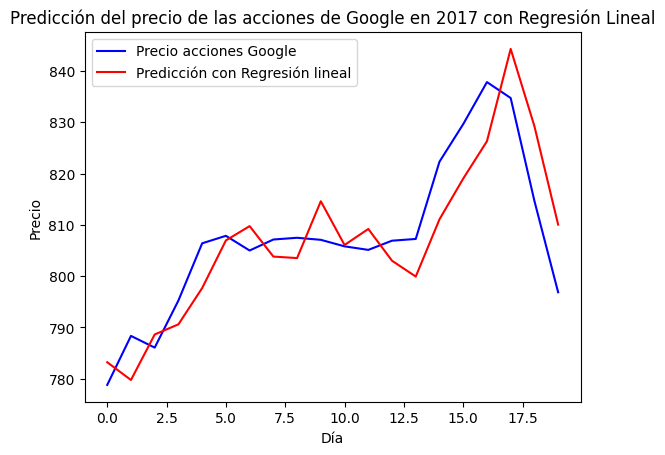

In [6]:
# 5- Predicciones y conclusión

# Precio real en 2017
datasetTest = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = datasetTest.iloc[:, 1:2].values

# Predicción del precio de las acciones en 2017
entireDataset = pd.concat((datasetTraining['Open'], datasetTest['Open']), axis = 0)
inputs = entireDataset[len(entireDataset) - len(datasetTest) - 60:].values
inputs = inputs.reshape(-1, 1)
inputs = sc.transform(inputs)
xTest = []
for i in range(60, 80):
    xTest.append(inputs[i-60:i, 0])
xTest = np.array(xTest)
xTest = np.reshape(xTest, (xTest.shape[0], xTest.shape[1], 1))
predicted_stock_price = regressor.predict(xTest.reshape(-1, 60))
predicted_stock_price = predicted_stock_price.reshape(-1, 1)
predicted_stock_price_descaled = sc.inverse_transform(predicted_stock_price)

# Representación
plt.plot(real_stock_price, color = 'Blue', label = 'Precio acciones Google')
plt.plot(predicted_stock_price_descaled, color = 'Red', label = 'Predicción con Regresión lineal')
plt.title('Predicción del precio de las acciones de Google en 2017 con Regresión Lineal')
plt.xlabel('Día')
plt.ylabel('Precio')
plt.legend()
plt.show()

In [7]:
mse = mean_squared_error(real_stock_price, predicted_stock_price_descaled)
print("Mean Squared Error (Regresión Lineal):", mse)

Mean Squared Error (Regresión Lineal): 61.90894493207097


## **RESULTADOS**

Los resultados obtenidos muestran la capacidad de predicción de los modelos para capturar patrones y tendencias en los datos históricos en un contexto de prueba.


1. *Calidad de la predicción*: Las visualizaciones proporcionan una representación gráfica de los precios de las acciones de Google en Enero de 2017, por tanto se miden los 20 días en los que el mercado está abierto, siendo la línea azul los valores reales y la línea roja los valores predichos, En el caso del modelo creado por RNN, los valores predichos se aproximan a los reales, lo cual sugiere que nuestro modelo tiene una capacidad razonable para capturar la tendencia general del precio de las acciones. Sin embargo, presenta mucha susceptibilidad a la volatilidad de los precios, es decir, no es capaz de adaptarse bien a los picos, lo cual se debe a los datos sensibles mencionados anteriormente. Con el modelo de Regresión Lineal, a pesar de existir diferencias, podemos ver que la predicción queda mejor ajustada a los valores reales, prediciendo con más acierto los picos y ajustándose con mayor precisión al máximo y al mínimo.

2. *Error cuadrático medio (MSE)*: media aritmética de los cuadrados de los errores, donde el error es la diferencia entre el valor real y el valor predicho por el modelo.
 Con RNN Obtenemos un MSE de 66.98 (lo mínimo obtenido, aunque oscila entre ese valor y 85), sugiere que hay una ligera diferencia entre los valores predichos y los reales. En el contexto de los precios de las acciones, este error podría considerarse alto, dependiendo de la escala de precios y la volatilidad del mercado, ya que el modelo no es capaz de prever los cambios abruptos en el precio de las acciones, debido a las condiciones del mercado y la disponibilidad de datos, ya que por ejemplo el lanzamiento de nuevos productos o la aparición de nuevos competidores, son factores que nunca prodemos incluir ya que se tratan de datos sensibles.
 Para el modelo de Regresión Lineal obtenemos un MSE de 61.908, sugiriendo que la relación entre las variables predictoras y la variable objetivo es relativamente lineal, y que la complejidad adicional de una RNN no proporciona beneficios significativos en este caso, ya que presenta la misma incapacidad de adaptación a los picos en los precios de las acciones, pero con mayor complejidad computacional.


## **CONCLUSIÓN**

La elección de los métodos para este estudio no fue aleatoria, sino que se basó en varios factores, incluyendo la complejidad de los datos, la disponibilidad de características relevantes y el rendimiento deseado del modelo. Tras haber obtenido los resultados expresados en el apartado anterior, podemos afirmar que los métodos elegidos para determinar el precio de las acciones, en este caso de Google en Enero de 2017, fueron apropiados y nos permitieron generar gráficos claros que facilitaron la interpretación, además de poder respaldarnos en datos numéricos como el cálculo del error.

Por un lado, el método de Redes Neuronales Recurrentes resulta muy útil en la predicción de series temporales, ya que se adapta bien a datos no lineales, lo cual lo hace a priori un buen modelo para nuestro estudio, dado que el análisis del mercado puede ser muy complejo.

Por otro lado, el método de Regresión Lineal es más sencillo tanto de estudiar como de interpretar. Sin embargo, obtuvimos resultados sólidos, incluso más precisos que los obtenidos con RNN. Al comparar los resultados de ambos métodos, observamos que la Regresión Lineal mostró una mejor capacidad para ajustarse a los datos de precios de acciones y proporcionar predicciones más precisas. Es decir, mientras que el modelo de RNN puede capturar la tendencia general, el modelo de Regresión Lineal demuestra una mejor capacidad para ajustarse a los datos reales y proporcionar predicciones más precisas, sugiriendo que los datos presentan un relación lineal.

En conclusión, hemos demostrado el potencial de las técnicas empleadas en un caso de uso extremadamente relevante. Aunque el modelo desarrollado muestra una capacidad prometedora para predecir los precios de las acciones de Google, es importante tener en cuenta sus limitaciones y considerar otros factores externos que puedan influir en los movimientos del mercado. Además, este proyecto sienta las bases para investigaciones futuras en áreas como la mejora de la precisión del modelo, la incorporación de datos adicionales y la exploración de otras arquitecturas de modelos, con el objetivo final de crear un modelo que sirva de apoyo para brokers a la hora de tomar decisiones.